In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sb
sb.set_style("whitegrid", {'axes.grid' : False})
sb.set(font_scale = 2)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier 

In [3]:
mydata = pd.read_csv('./DataSet/'+os.listdir('./DataSet/')[0])

In [4]:
mydata.head()

,Fe1,Fe2,Fe3,Fe4,Fe5,Fe6,Fe7,Fe8,Fe9,Fe10,Fe11,Fe12,Target
0,12.458832,-16.448414,1.424470,8.244318,8.066360,-7.012073,0.617112,2.495281,1.643427,3.686131,4.258802,-2.053982,0.0
1,11.119879,-17.778618,5.533296,3.381273,1.806353,-9.859234,1.576537,6.725568,5.326158,7.524144,6.922959,0.546061,1.0
2,11.189757,-14.015076,2.784315,2.265199,7.355902,-5.143250,1.111855,4.518879,2.041801,-0.185706,-0.067000,-2.454741,2.0
3,11.235970,-14.365056,5.037139,9.721961,8.606514,-9.534805,-2.643970,1.593297,6.261624,8.396824,5.600394,-1.571091,3.0
4,12.261164,-14.995311,-6.598445,3.495566,8.137846,-10.759890,4.869417,9.317735,1.930489,4.994082,4.261021,0.172139,4.0


In [5]:
prout=mydata[mydata['Target'].isin([0, 2])]

In [6]:
prout

,Fe1,Fe2,Fe3,Fe4,Fe5,Fe6,Fe7,Fe8,Fe9,Fe10,Fe11,Fe12,Target
0,12.458832,-16.448414,1.424470,8.244318,8.066360,-7.012073,0.617112,2.495281,1.643427,3.686131,4.258802,-2.053982,0.0
2,11.189757,-14.015076,2.784315,2.265199,7.355902,-5.143250,1.111855,4.518879,2.041801,-0.185706,-0.067000,-2.454741,2.0
10,12.769667,-15.967969,-1.988556,8.049867,8.489486,-9.025256,0.515926,1.822053,-1.061175,4.118340,4.932661,-4.071278,0.0
12,11.866937,-16.372232,7.210921,4.236865,7.901960,-1.150182,2.064488,4.026253,4.331372,3.245808,2.020861,-1.362857,2.0
20,12.465174,-15.547221,-1.435081,10.570431,6.932529,-6.816741,2.318597,1.639874,1.606081,7.134900,2.476725,-5.946411,0.0
22,11.846945,-17.073623,4.733477,3.543917,4.923212,-4.920323,3.661396,2.602073,-0.452627,2.808117,2.877891,-3.382249,2.0
30,12.792042,-13.500827,-6.842444,10.382572,10.411700,-14.127313,-1.111567,0.606564,-3.518160,0.789645,2.581930,-3.848883,0.0
32,10.760666,-12.146404,2.647427,4.406000,8.844384,-4.177428,-0.259288,1.773676,3.684664,1.537864,0.714740,-3.993188,2.0
40,11.967067,-16.648248,-0.468161,8.286548,7.665959,-9.382275,-1.154507,2.193630,2.436240,4.878689,4.895678,-2.707363,0.0
42,11.697440,-15.898988,1.352576,1.002709,6.332804,-1.370149,4.256682,1.752647,0.575744,2.000479,0.766701,-3.235653,2.0


In [7]:
prout.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28 entries, 0 to 132
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Fe1     28 non-null     float64
 1   Fe2     28 non-null     float64
 2   Fe3     28 non-null     float64
 3   Fe4     28 non-null     float64
 4   Fe5     28 non-null     float64
 5   Fe6     28 non-null     float64
 6   Fe7     28 non-null     float64
 7   Fe8     28 non-null     float64
 8   Fe9     28 non-null     float64
 9   Fe10    28 non-null     float64
 10  Fe11    28 non-null     float64
 11  Fe12    28 non-null     float64
 12  Target  28 non-null     float64
dtypes: float64(13)
memory usage: 3.1 KB


In [8]:
var = mydata.select_dtypes(include=object)
print(var)

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[140 rows x 0 columns]


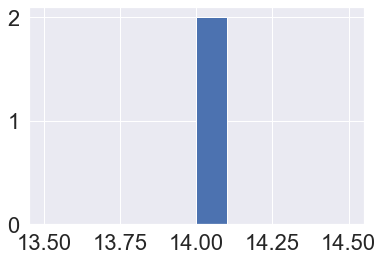

In [9]:
prout['Target'].value_counts().hist()

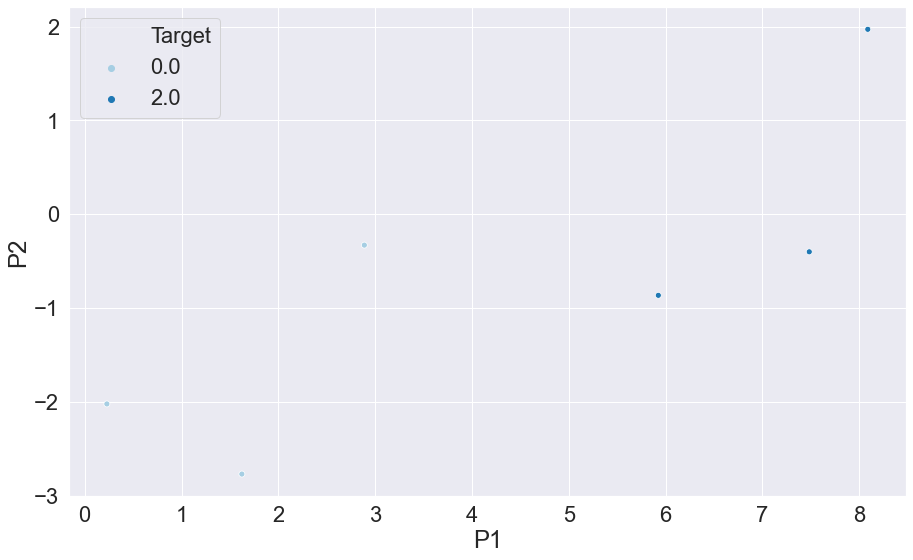

In [10]:
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df2 = pd.DataFrame(pca.fit_transform(prout.iloc[:, :-1]))

df2["Target"] = prout["Target"]
df2.columns = ["P1","P2","Target"]


plt.figure(1,figsize=(15,9))
plt.clf()
sns.scatterplot(x="P1",y="P2",hue="Target",data=df2, palette = "Paired")



#plt.plot(x,y,"+")

plt.xlabel('P1')
plt.ylabel('P2')
plt.show()

In [11]:
y = prout['Target']
X = prout.iloc[:,:-1]
X.shape

(28, 12)

In [12]:
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier as xgb
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.preprocessing import MinMaxScaler
param_range = [1, 2, 3, 4, 5, 6]
param_range_fl = [1.0, 0.5, 0.1]
n_estimators = [50,100,150]
learning_rates = [.1,.2,.3]


pipe = Pipeline([('scaler', StandardScaler()),
                 ('svc', SVC())])
#pipe.fit(X_train, y_train)
#print("Test score: {:.2f}".format(pipe.score(X_test, y_test)))

param_grid = { 'svc__kernel': ['linear', 'rbf'],
               'svc__C':[1, 10]}
grid = GridSearchCV(pipe, param_grid=param_grid, cv=2)
grid.fit(X_train, y_train)
print('Best cross-validation accuracy: {:.2f}'.format(grid.best_score_))
print("Test set score: {:.2f}".format(grid.score(X_test, y_test)))
print("Best parametre: {}".format(grid.best_params_))



Best cross-validation accuracy: 0.91
Test set score: 1.00
Best parametre: {'svc__C': 1, 'svc__kernel': 'rbf'}


In [15]:
X_train.shape

(22, 12)

In [16]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('svc', SVC(probability=True))])

parameters = { 'svc__kernel': ['linear', 'rbf'],
               'svc__C':[1, 10]}

Exp = GridSearchCV(pipe, 
                   param_grid = parameters, 
                   cv = 2)

Exp.fit(X_train, y_train)

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svc', SVC(probability=True))]),
             param_grid={'svc__C': [1, 10], 'svc__kernel': ['linear', 'rbf']})

In [17]:
print("predicted proba:\n{}".format(Exp.predict_proba(X_test)))
print('Sums: {}'.format(Exp.predict(X_test)))

predicted proba:
[[0.81140548 0.18859452]
 [0.59202994 0.40797006]
 [0.92702674 0.07297326]
 [0.02991208 0.97008792]
 [0.915642   0.084358  ]
 [0.1646402  0.8353598 ]]
Sums: [0. 0. 0. 2. 0. 2.]


In [18]:
y_test

0      0.0
100    0.0
130    0.0
42     2.0
40     0.0
52     2.0
Name: Target, dtype: float64